<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The input layer is made up of artificial input 'neurons', and brings in the data for processing in the subsequent layers.
### Hidden Layer:
Hidden layers are the layers between the input and output that handle the actual computations you are trying to do, and pass their new data onto the next hidden layer, until the data is ready to be output.
### Output Layer:
An output layer is basically just the result of your computations done by your hidden layers, on the data from the input layer.
### Neuron:
A neuron in the context if Artificial NNs is a mathematical function that models the function of a biological neuron
### Weight:
weight is the parameter that actually changes the input data while moving through the hidden layers
### Activation Function:
an activation function basically just defines the output of a node based on the input or set of inputs
### Node Map:
Node maps are a visual diagram of the topology, or architecture, of an artificial neural network. They are usually color coded and help us understand the architectural differences between different kinds of neural networks
### Perceptron:
 A perceptron does certain computations to detect features and/or business intelligence in the input data.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### You start with an input. I like the example from 3blue1brown about handwritten numbers, so I'll use that. 
In this example, the input data will be a handwritten '9', in a 28x28 pixel format. the input image first assigns weights to the input data, row by row, then the bias is what tells the network how high the weighted sums need to be in order for it to be meaningfully active. In this case, the weights will tell you where edges are on each layer, then the bias will tell the network when an edge is actually meaningful. This will create a new neuron for every row of the image, each with a weight and bias indicating how meaningful it is. These new neurons will make up our first hidden layer. Now the network will look through each of those edges, and decide if any can be put together to form a pattern. in the example, the patterns we would want to find for a '9' are a circle on the top half, and a vertical line extending down from the right side of the circle. So the second hidden layer with find all of the different possible patterns. Finally, the output will give the last hidden layer a certain number of options, and the Network will decide which is most likely, and give you an output. In this example, the activation function would go up from 0-9 looking for the right patterns,(for example, would see the circle at the top of an eight, then see that our input doesnt have a second circle below it, so it would move on to 9), confirm the patterns, then give you the output.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [26]:
# instantiate our x variable; matrix of x1, x2, and one with all 1s for the bias
inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])

correct_outputs = [[1], [1], [1], [0]]


In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [28]:
# initialize random weights for our 3 inputs(need weight for each input)
weights = 2 * np.random.random((3,1)) - 1
weights


array([[-0.51385916],
       [-0.37708675],
       [-0.08140275]])

In [29]:
# calculate weighted sum of inputs
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[-0.08140275],
       [-0.59526191],
       [-0.4584895 ],
       [-0.97234866]])

In [30]:
# activated value for the end of 1 training epoch
activated_output = sigmoid(weighted_sum)
activated_output # true values are [1,1,1,0]

array([[0.47966054],
       [0.35542844],
       [0.38734422],
       [0.27441261]])

In [31]:
# error
error = correct_outputs - activated_output

In [32]:
# gradient descent/backprop-- magic for now, will learn in LS_DS_422
adjusted = error * sigmoid_derivative(activated_output)
adjusted

array([[ 0.1228804 ],
       [ 0.15615889],
       [ 0.1475596 ],
       [-0.0673277 ]])

In [33]:
# update weights
weights += np.dot(inputs.T, adjusted)
weights

array([[-0.42502797],
       [-0.29685485],
       [ 0.27786845]])

In [34]:
# Steps we've already done: 
# 1. Randomly Initialized Weights already. Those are in memory as `weights`
# 2. We've already got input data & correct_outputs


# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-11.84023451]
 [-11.84023451]
 [ 17.80921618]]
Output after training
[[0.99999998]
 [0.99744942]
 [0.99744942]
 [0.00281169]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [13]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes.columns[8]

'Outcome'

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [15]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

# features
feats = list(diabetes)[:-1]
# split up into train and test data
X = diabetes[feats]
normalized = Normalizer().fit_transform(X)


In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
        sx = sigmoid(x)
        return sx * (1-sx)

In [47]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        # Randomly Initialize Weights
        # weights
        self.weights = np.zeros(X.shape[1])
        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            # weighted sum of inputs
            weighted_sum = np.dot(X, self.weights)    
            # Activate!
            activated_output = sigmoid(weighted_sum)    
            # Cac error
            error = y - activated_output    
            adjustments = error * sigmoid_derivative(activated_output)   
            # Update the Weights
            self.weights += np.dot(X.T, adjustments)
        return self.weights

    def predict(self, X):
        """Return class label after unit step"""
        calcs = np.dot(X, self.weights)
        return np.where(calcs >= .5, 1, 0)


In [48]:
X = Normalizer().fit_transform(diabetes[feats])
y = diabetes['Outcome']

In [49]:
perceptron = Perceptron(150)
weights = perceptron.fit(X, y)
weights

array([ 30.0738127 , -14.71242511, -93.98387466, -13.61855156,
       -16.99418773,  -0.87510791,   1.04191842,  -5.00087061])

In [51]:
predictions = perceptron.predict(X)

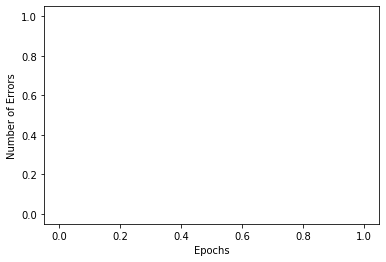

In [56]:
import matplotlib.pyplot as plt
pn = Perceptron()
fit = pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.show()

In [57]:
perceptron.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?